In [20]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
diabetes = load_diabetes()

In [3]:
df_X, df_y = diabetes["data"], diabetes['target']

In [4]:
import numpy as np
df_X = np.array(df_X)
df_y = np.array(df_y)

In [5]:
X_train, X_test, y_train, y_test= train_test_split(df_X,df_y, test_size = 0.2, random_state = 42)

In [6]:
W = np.random.rand(10)
b = np.random.rand()

In [14]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
        predictions += b
    return predictions

In [8]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean() # 두 값의 차이의 제곱의 평균
    return mse

In [9]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [10]:
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)

    # y_pred 준비
    y_pred = model(X, W, b)

    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)

    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [11]:
LEARNING_RATE = 0.0001

In [16]:
losses = []
for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 28117.3131
Iteration 20 : Loss 27251.7623
Iteration 30 : Loss 26420.1805
Iteration 40 : Loss 25621.2344
Iteration 50 : Loss 24853.6430
Iteration 60 : Loss 24116.1758
Iteration 70 : Loss 23407.6504
Iteration 80 : Loss 22726.9309
Iteration 90 : Loss 22072.9258
Iteration 100 : Loss 21444.5868
Iteration 110 : Loss 20840.9063
Iteration 120 : Loss 20260.9167
Iteration 130 : Loss 19703.6880
Iteration 140 : Loss 19168.3268
Iteration 150 : Loss 18653.9750
Iteration 160 : Loss 18159.8080
Iteration 170 : Loss 17685.0334
Iteration 180 : Loss 17228.8902
Iteration 190 : Loss 16790.6470
Iteration 200 : Loss 16369.6014
Iteration 210 : Loss 15965.0783
Iteration 220 : Loss 15576.4293
Iteration 230 : Loss 15203.0312
Iteration 240 : Loss 14844.2856
Iteration 250 : Loss 14499.6173
Iteration 260 : Loss 14168.4738
Iteration 270 : Loss 13850.3242
Iteration 280 : Loss 13544.6586
Iteration 290 : Loss 13250.9870
Iteration 300 : Loss 12968.8386
Iteration 310 : Loss 12697.7612
Iteration 320 : L

In [18]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

5437.82053232092

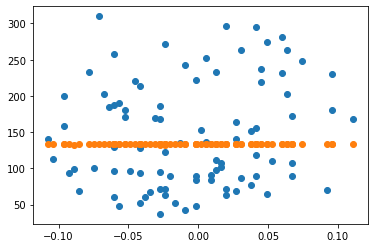

In [21]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

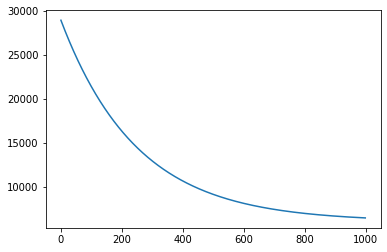

In [22]:
plt.plot(losses)
plt.show()